<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Markov Processes (Markov Chains)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A Markov chain is a **discrete-time stochastic process** that progresses from one state to another with certain probabilities that can be **represented by a graph and state transition matrix P** as indicated below:

<img src="https://raw.githubusercontent.com/deltorobarba/machinelearning/master/markov.PNG" alt="markov">

**Definition**

* A Markov chain is a mathematical system that experiences transitions from one state to another according to certain probabilistic rules. In a Markov Chain the next state depends only on the current state, the **Markov property**. (A state in this context refers to the assignment of values to the parameters). The concept of a Markov Chain is that we do not need to know the entire history of a process to predict the next output, an approximation that works well in many real-world situations.

* The defining characteristic of a Markov chain is that no matter how the process arrived at its present state, the possible future states are fixed. In other words, the probability of transitioning to any particular state is dependent solely on the current state and time elapsed. Hence, a **Markov Chain is memoryless** because only the current state matters and not how it arrived in that state.

* The **state space**, or set of all possible states, can be anything: letters, numbers, weather conditions, baseball scores, or stock performances.

* Markov chains may be modeled by **finite state machines, and random walks** provide a prolific example of their usefulness in mathematics. They arise broadly in statistical and information-theoretical contexts and are widely employed in economics, game theory, queueing (communication) theory, genetics, and finance. While it is possible to discuss Markov chains with any size of state space, the initial theory and most applications are focused on cases with a finite (or countably infinite) number of states.

## **Properties**

A variety of descriptions of either a specific state in a Markov chain or the entire Markov chain allow for better understanding of the Markov chain's behavior. Let P be the transition matrix of Markov chain {X0, X1, ...}.

* **Reducibility**: a Markov chain is said to be irreducible if it is possible to get to any state from any state. In other words, a Markov chain is irreducible if there exists a chain of steps between any two states that has positive probability.

* **Periodicity**: a state in a Markov chain is periodic if the chain can return to the state only at multiples of some integer larger than 1. Thus, starting in state 'i', the chain can return to 'i' only at multiples of the period 'k', and k is the largest such integer. State 'i' is aperiodic if k = 1 and periodic if k > 1.

* **Transience and Recurrence**: A state 'i' is said to be transient if, given that we start in state 'i', there is a non-zero probability that we will never return to 'i'. State i is recurrent (or persistent) if it is not transient. A recurrent state is known as positive recurrent if it is expected to return within a finite number of steps and null recurrent otherwise. Transience and recurrence issues are central to the study of Markov chains and help describe the Markov chain's overall structure. The presence of many transient states may suggest that the Markov chain is absorbing, and a strong form of recurrence is necessary in an ergodic Markov chain.

* **Ergodicity**: a state 'i' is said to be ergodic if it is aperiodic and positive recurrent. If all states in an irreducible Markov chain are ergodic, then the chain is said to be ergodic. Ergodic Markov chains are, in some senses, the processes with the "nicest" behavior.

* **Absorbing State**: a state i is called absorbing if it is impossible to leave this state. Therefore, the state 'i' is absorbing if pii = 1 and pij = 0 for i ≠ j. If every state can reach an absorbing state, then the Markov chain is an absorbing Markov chain. Absorbing states are crucial for the discussion of absorbing Markov chains. A common type of Markov chain with transient states is an absorbing one. An absorbing Markov chain is a Markov chain in which it is impossible to leave some states, and any state could (after some number of steps, with positive probability) reach such a state. It follows that all non-absorbing states in an absorbing Markov chain are transient.

**Relation to Random Walks**

* A Markov process is a random walk, but there are also other types of Random walks, that are not Markov processes.

* Various types of random walks are of interest, which can differ in several ways. The term itself most often refers to a special category of Markov chains or Markov processes, but many time-dependent processes are referred to as random walks, with a modifier indicating their specific properties. 

* Random walks (Markov or not) can also take place on a variety of spaces: commonly studied ones include graphs, others on the integers or the real line, in the plane or higher-dimensional vector spaces, on curved surfaces or higher-dimensional Riemannian manifolds, and also on groups finite, finitely generated or Lie.

## **Stochastic (State Transition) Matrix**

* A stochastic matrix is a square matrix used to describe the transitions of a Markov chain. This means a transition matrix contains information on the **probability of transitioning between states**.

* Each of its entries is a nonnegative real number representing a probability. It is also called a probability matrix, transition matrix, substitution matrix, or Markov matrix.

* A stochastic matrix describes a Markov chain X<sub>t</sub> over a [**finite state space (Probability space) S**](https://en.m.wikipedia.org/wiki/Probability_space) with cardinality S.

* If the probability of moving from i to j in one time step is Pr(j|i)= P<sub>i,j</sub>, the stochastic matrix P is given by using P<sub>i,j</sub> as the ith row and jth column element, e.g.,

This means each row of the matrix is a probability vector, and the sum of its entries is 1. The total of transition probability from a state i to all other states must be 1.

> $P=\left[\begin{array}{cccccc}
P_{1,1} & P_{1,2} & \dots & P_{1, j} & \dots & P_{1, S} \\
P_{2,1} & P_{2,2} & \dots & P_{2, j} & \dots & P_{2, S} \\
\vdots & \vdots & \ddots & \vdots & \ddots & \vdots \\
P_{i, 1} & P_{i, 2} & \dots & P_{i, j} & \dots & P_{i, S} \\
\vdots & \vdots & \ddots & \vdots & \ddots & \vdots \\
P_{S, 1} & P_{S, 2} & \dots & P_{S, j} & \dots & P_{S, S}
\end{array}\right]$

## **Stationary Distribution**

The implementation below is not a simulation of the state transitions, just a calculation of the stationary distribution. Let’s start with an iterative approach to calculating the distribution. What we are doing is raising the transition matrix to the power of the number of iterations.

> $s_{1}=s_{0} P, \quad s_{2=} s_{1} P=\left(s_{o} P\right) P=s_{0} P^{2} \ldots . \quad s_{n}=s_{0} P^{n}$

The stationary distribution is usually referred to as π.

> $\pi=s_{0} P^{n} ; n \rightarrow \infty$


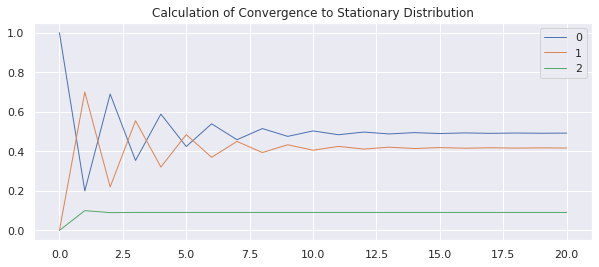

In [6]:
from random import seed
from random import random
sns.set(rc={'figure.figsize':(10, 4), "lines.linewidth": 1.0})

P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])

state=np.array([[1.0, 0.0, 0.0]])

stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]

iterations= 20

for x in range(iterations):
  state=np.dot(state,P)
  stateHist=np.append(stateHist,state,axis=0)

dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot(title="Calculation of Convergence to Stationary Distribution")
plt.show()

In [4]:
# Print our exact values
print(state)

[[0.49229934 0.41679157 0.09090909]]


**The calculation converges to the stationary distribution quite quickly**. With Pi being the stationary distribution, as described earlier. This may also be accomplished in this case with a linear algebra solution of a set of over-determined equations:

In [ ]:
A = np.append(np.transpose(P) - np.identity(3),
              [[1,1,1]],
              axis=0)

b = np.transpose(np.array([0,0,0,1]))

np.linalg.solve(np.transpose(A).dot(A), 
                np.transpose(A).dot(b))

array([0.49197861, 0.4171123 , 0.09090909])

Which also returns [0.49, 0.42 , 0.09], the stationary distribution π. It can be shown that a Markov chain is stationary with stationary distribution π if πP=π and πi=1, where i is a unit column vector — i.e. the sum of the probabilities must be exactly 1.

## **Simulating from a Markov Chain**

**Example 1: Simulate from a Markov Chain by simulating from a multinomial distribution**

* One can simulate from a Markov chain by noting that the collection of moves from any given state (the corresponding row in the probability matrix) form a multinomial distribution. One can thus simulate from a Markov Chain by simulating from a multinomial distribution.

* One way to simulate from a [multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution) is to divide a line of length 1 into intervals proportional to the probabilities, and then picking an interval based on a uniform random number between 0 and 1. ([Source](https://towardsdatascience.com/markov-chain-analysis-and-simulation-using-python-4507cee0b06e))

[[0.50299401 0.40918164 0.08782435]]
[[0.20238095 0.68253968 0.11507937]
 [0.92682927 0.         0.07317073]
 [0.23255814 0.76744186 0.        ]]


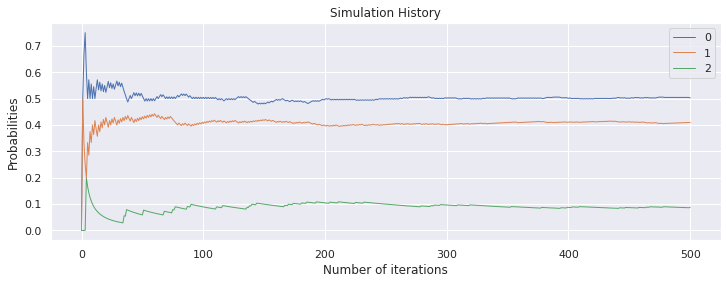

In [7]:
from random import seed
from random import random
sns.set(rc={'figure.figsize':(12, 4), "lines.linewidth": 1.0})

P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])

stateChangeHist= np.array([[0.0,  0.0,  0.0],
                          [0.0, 0.0,  0.0],
                          [0.0, 0.0,  0.0]])

state=np.array([[1.0, 0.0, 0.0]])
currentState=0
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]
seed(4)

# Simulate from multinomial distribution
def simulate_multinomial(vmultinomial):
  r=np.random.uniform(0.0, 1.0)
  CS=np.cumsum(vmultinomial)
  CS=np.insert(CS,0,0)
  m=(np.where(CS<r))[0]
  nextState=m[len(m)-1]
  return nextState

iterations = 500

for x in range(iterations):
  currentRow=np.ma.masked_values((P[currentState]), 0.0)
  nextState=simulate_multinomial(currentRow)
  # Keep track of state changes
  stateChangeHist[currentState,nextState]+=1
  # Keep track of the state vector itself
  state=np.array([[0,0,0]])
  state[0,nextState]=1.0
  # Keep track of state history
  stateHist=np.append(stateHist,state,axis=0)
  currentState=nextState
  # calculate the actual distribution over the 3 states so far
  totals=np.sum(stateHist,axis=0)
  gt=np.sum(totals)
  distrib=totals/gt
  distrib=np.reshape(distrib,(1,3))
  distr_hist = np.append(distr_hist,distrib,axis=0)
print(distrib)
P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]

# Check estimated state transition probabilities based on history so far:
print(P_hat)
dfDistrHist = pd.DataFrame(distr_hist)

# Plot the distribution as the simulation progresses over time
dfDistrHist.plot(title="Simulation History")
plt.xlabel("Number of iterations")
plt.ylabel("Probabilities")
plt.show()

**Example 2: yyy**

In [ ]:
# The statespace
states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

In [ ]:
# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# Function that forecasts the possible state for the next 2 days
activity_forecast(2)

Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3


https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial